# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
#image_path = '...'

A = imread("TarantulaNebula.jpg")

Visualize the picture

(-0.5, 629.5, 566.5, -0.5)

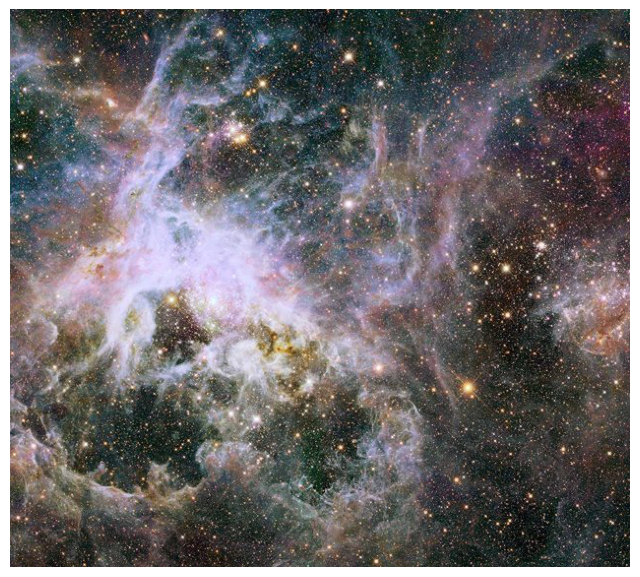

In [3]:
img = plt.imshow(A)
plt.axis('off')

Convert the picture to gray-scale and visualize it.

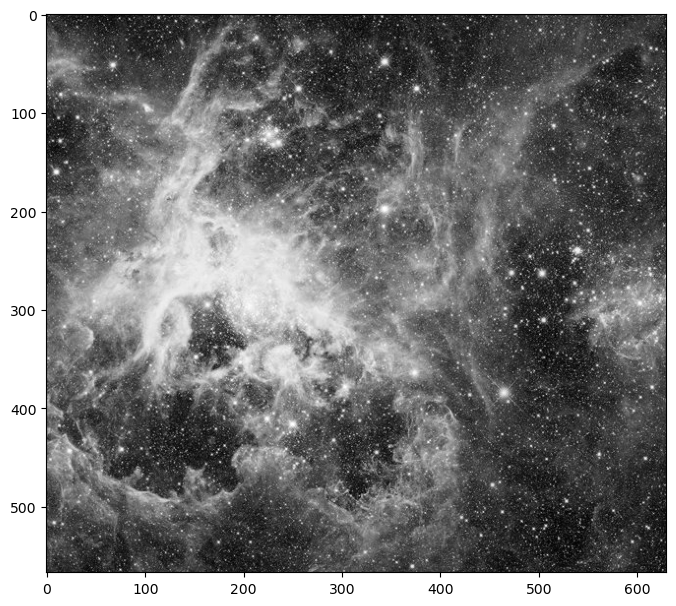

In [4]:
# fill here
X = np.mean(A,axis=2)
plt.imshow(X, cmap='gray')

What is the picture size?

In [5]:
X.shape

(567, 630)

Perform the SVD decomposition

In [6]:
U,S,Vt = np.linalg.svd(X,full_matrices=False)

Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

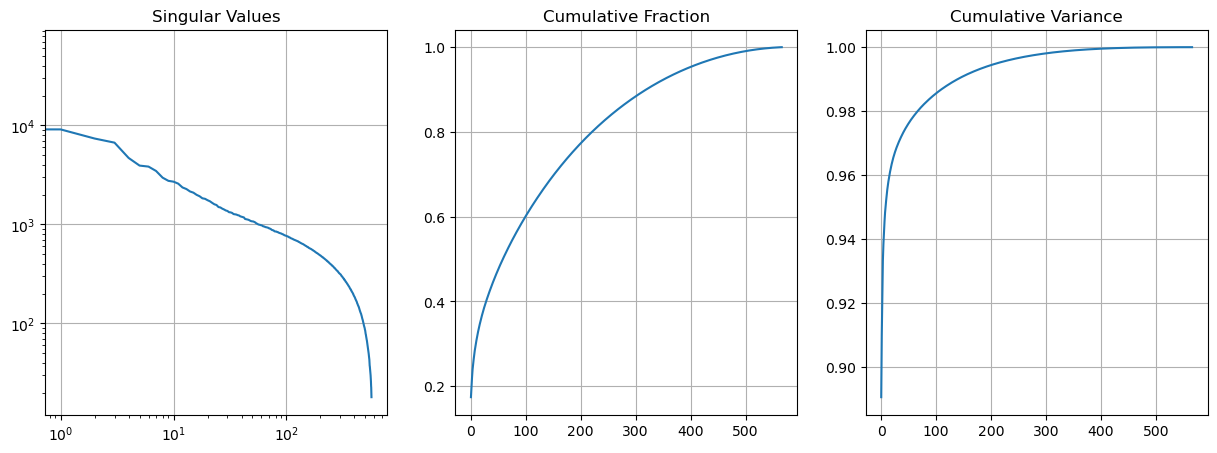

In [13]:
rank = np.linalg.matrix_rank(X)

cum_frac = np.cumsum(S)/np.sum(S)
cum_var = np.cumsum(S**2)/np.sum(S**2)

fig,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].loglog(range(rank),S)
#ax[0].set_yscale('log')
ax[0].set_title('Singular Values')
ax[0].grid()

ax[1].plot(range(rank),cum_frac)
ax[1].set_title('Cumulative Fraction')
ax[1].grid()

ax[2].plot(range(rank),cum_var)
ax[2].set_title('Cumulative Variance')
ax[2].grid()

Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

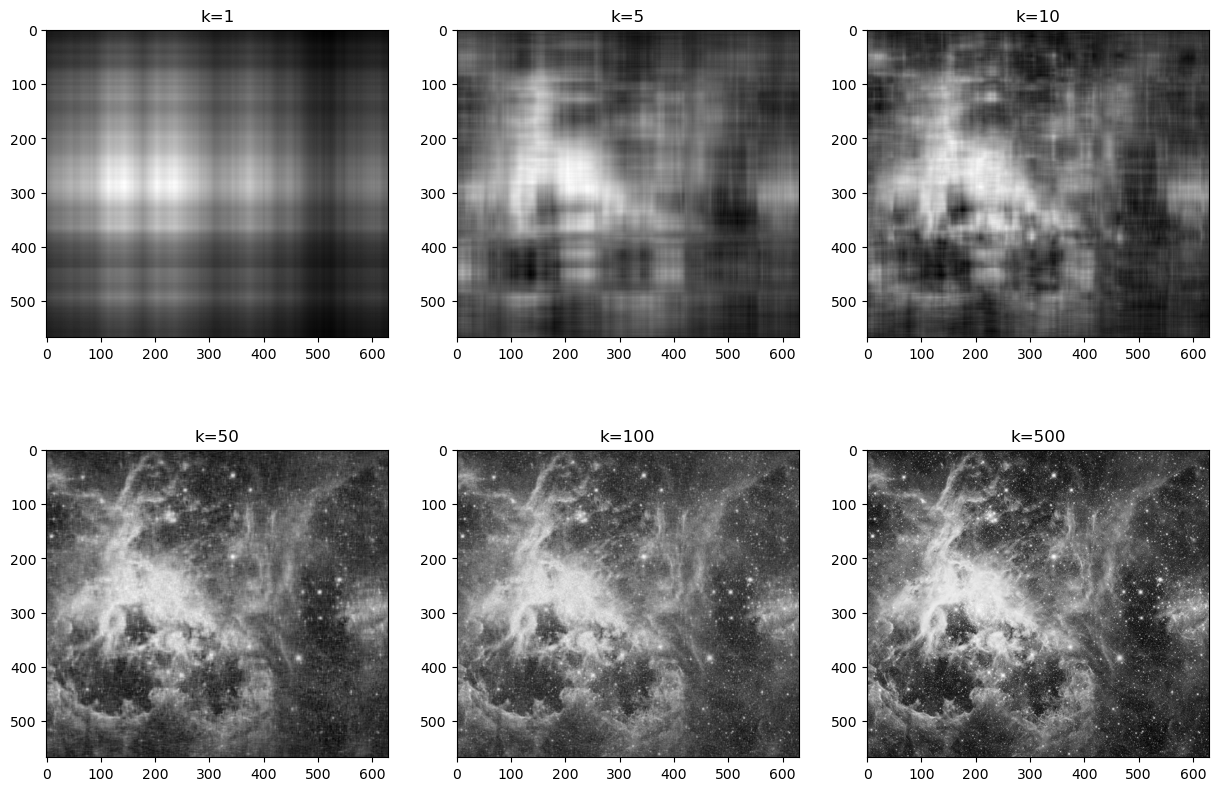

In [19]:
k_values = [1,5,10,50,100,500]

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.reshape(-1)
for i, k in enumerate(k_values):
    X_k = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    ax[i].imshow(X_k, cmap='gray')
    ax[i].set_title(f'k={k}')

Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

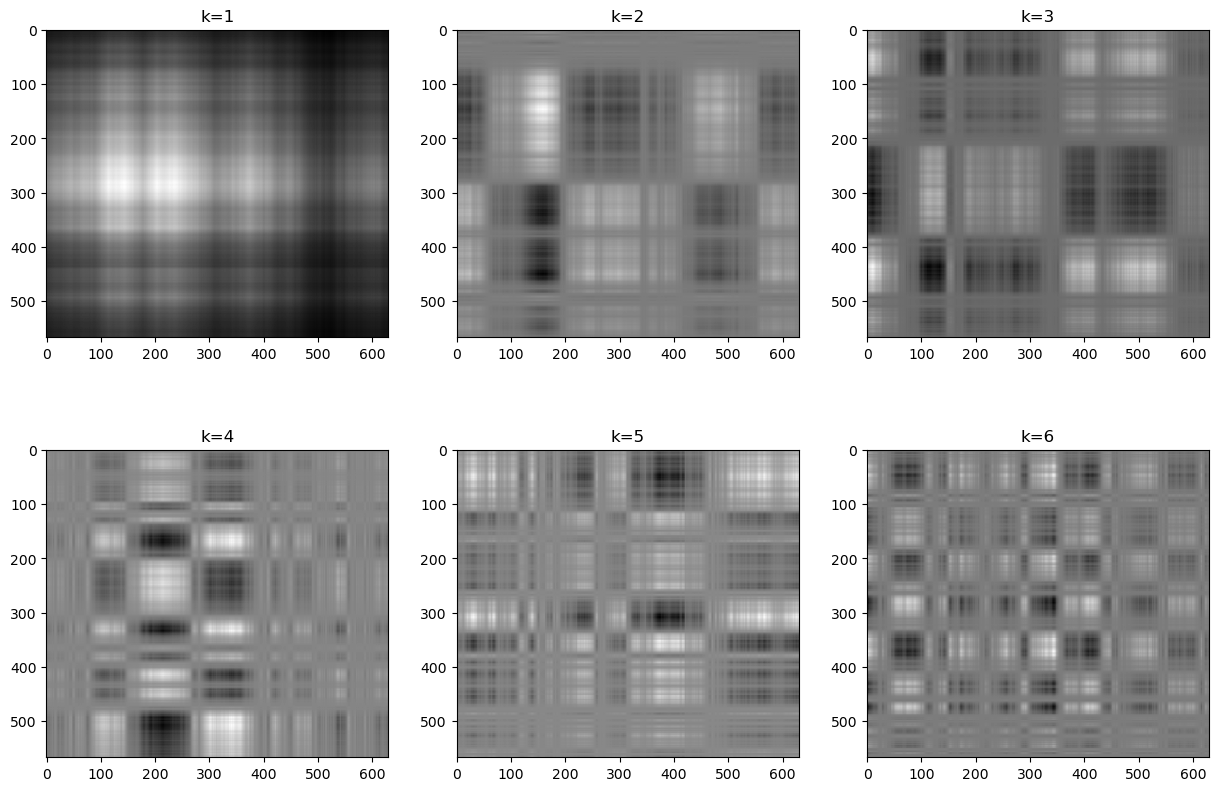

In [23]:
fig,ax = plt.subplots(2,3,figsize=(15,10))
ax = np.ravel(ax)
for k in range(6):
    X_k = np.outer(U[:,k],Vt[k,:])
    ax[k].imshow(X_k,cmap='gray')
    ax[k].set_title(f'k={k+1}')